In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from sklearn.svm import SVR
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

In [3]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [4]:
# Calculate mutual information for each feature
mi = mutual_info_regression(X, y)

In [5]:
# Create a DataFrame to display mutual information values for each feature
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

In [6]:
# Sort by mutual information score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

In [7]:
# Print the mutual information scores
print(mi_df)

                           Feature  Mutual Information
3                      Loan_Amount            0.211243
18  social mediaplatform_Instagram            0.085317
9       Transaction_Behavior_Score            0.071561
10              demographics_Rural            0.050926
1                              Age            0.024206
2                           Income            0.019709
12              demographics_Urban            0.000000
17   social mediaplatform_Facebook            0.000000
16             profession_Student             0.000000
15    profession_Software Engineer            0.000000
14       profession_Market Manager            0.000000
13             demographics_Urban             0.000000
0                           gender            0.000000
11          demographics_Sub_Urban            0.000000
8      Social_Media_Activity_Score            0.000000
7     Mobile_Phone_Payment_On_Time            0.000000
6         Utility_Payments_On_Time            0.000000
5         

In [8]:
# You can now select the most informative features based on the MI score
# For example, selecting the top 5 features based on MI
selected_features = mi_df['Feature'].head(5).values

In [9]:
# Step 6: Initialize the RBF SVR model
svr_rbf = SVR(kernel='rbf')

# Step 7: Train the RBF SVR model on the selected features
svr_rbf.fit(X, y)

# Step 8: Predict on the test set
y_pred = svr_rbf.predict(X)


In [10]:
# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.06949786092868802
Mean Absolute Error (MAE): 0.21816151679800505
Root Mean Squared Error (RMSE): 0.263624469518078


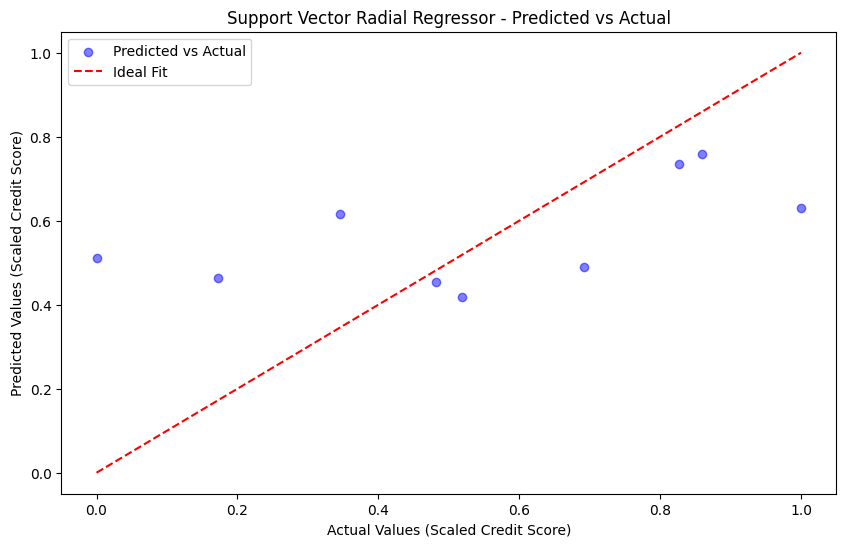

In [11]:
# Plot Regression Line (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values (Scaled Credit Score)")
plt.ylabel("Predicted Values (Scaled Credit Score)")
plt.title("Support Vector Radial Regressor - Predicted vs Actual")
plt.legend()
plt.show()